In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Q1. Use Simple K-means algorithm for clustering on any dataset. Compare the performance of clusters by changing the initialization parameters (rand, kmeans++,fixed) involved in the algorithm. Compare the SSE and weighted purity of these  three clustering schemes

In [2]:
df=pd.read_csv('Kmeans.csv')
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df['Income']=scaler.fit_transform(df[['Income']])
df['Age ']=scaler.fit_transform(df[['Age ']])
df

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


# init='k-means++'

In [4]:
Km=KMeans(n_clusters=3, init='k-means++',n_init=5)
y_predicted=Km.fit_predict(df[['Age ','Income']])
df['clusters']=y_predicted
df

,Name,Age,Income,clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


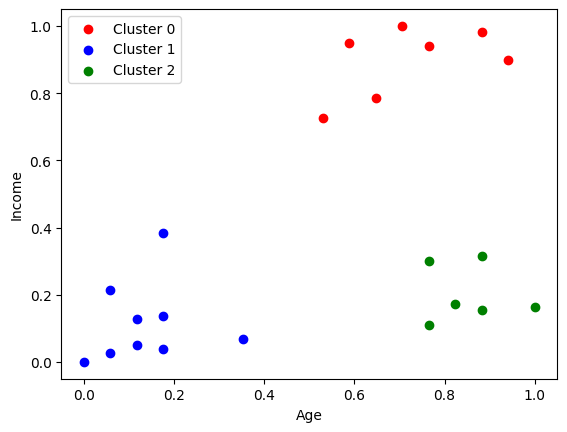

In [5]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['Age '], df1['Income'], c='red', label='Cluster 0')
plt.scatter(df2['Age '], df2['Income'], c='blue', label='Cluster 1')
plt.scatter(df3['Age '], df3['Income'], c='green', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


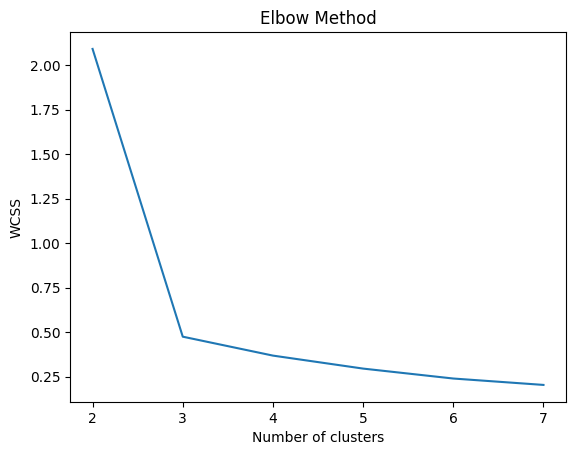

In [6]:
wcss = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
    km.fit(df[['Age ','Income']])
    wcss.append(km.inertia_)
plt.plot(range(2, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

init='random'

In [7]:
Km=KMeans(n_clusters=3, init='random',n_init=5)
y_predicted=Km.fit_predict(df[['Age ','Income']])
df['clusters']=y_predicted
df

,Name,Age,Income,clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


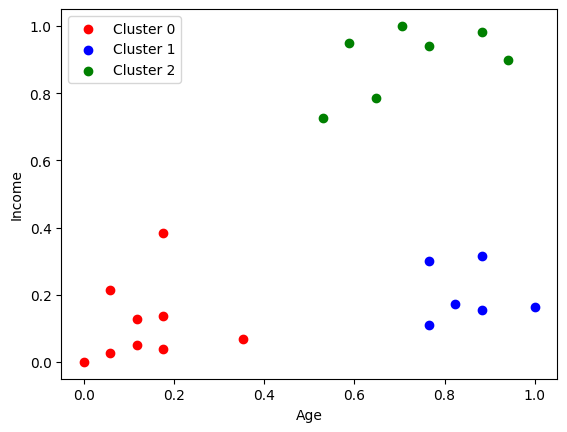

In [8]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['Age '], df1['Income'], c='red', label='Cluster 0')
plt.scatter(df2['Age '], df2['Income'], c='blue', label='Cluster 1')
plt.scatter(df3['Age '], df3['Income'], c='green', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


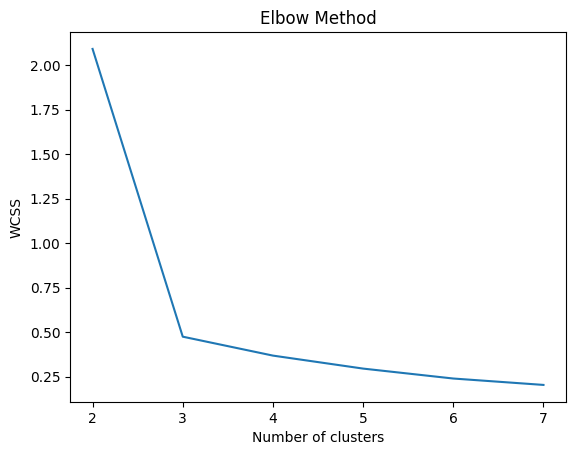

In [9]:
wcss = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
    km.fit(df[['Age ','Income']])
    wcss.append(km.inertia_)
plt.plot(range(2, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Q2. Use Iris/ Dry Bean Dataset/Wine dataset to apply Hierarchical agglomerative clustering and plot the dendrogram

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [12]:
wine=load_wine()
scaler=MinMaxScaler()
wine_data=scaler.fit_transform(wine.data)
wine_df=pd.DataFrame(data=wine_data ,columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [13]:
Encoder=LabelEncoder()
target=Encoder.fit_transform(wine.target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
wine_df['target']=target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2


In [15]:
Agclf=AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='single')
Agclf_predict=Agclf.fit_predict(wine_data)
Agclf_predict


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
wine_df['predicted clusters']=Agclf_predict
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,predicted clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2,0


In [17]:
wine_df.shape

(178, 15)

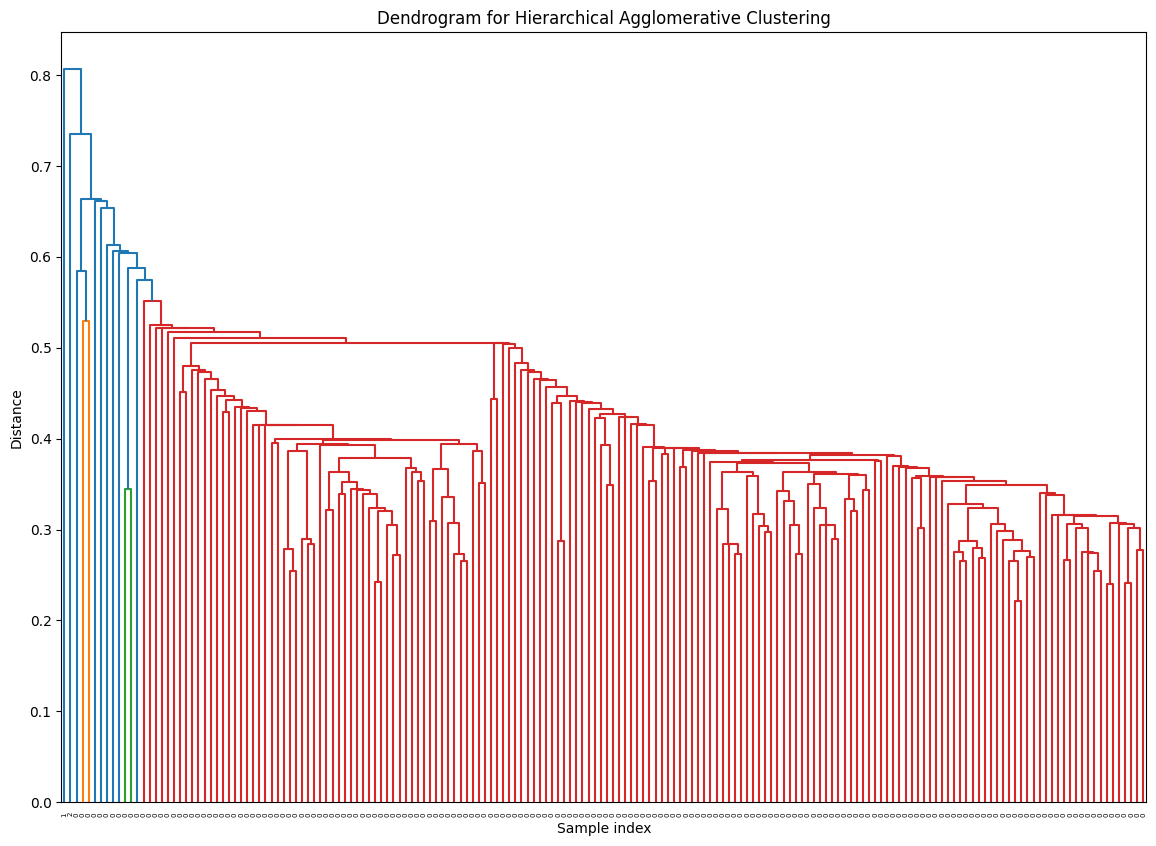

In [18]:
plt.figure(figsize=(14, 10))
Z = linkage(wine_data, method='single', metric='euclidean')
dendrogram(Z,labels=Agclf_predict)
plt.title('Dendrogram for Hierarchical Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



# Q3. Find the desired number of clusters as per total class labels on the selected dataset using Hierarchical agglomerative clustering then compute following supervised evaluation metrics:
Entropy
Weighted purity
Precision
Recall
F-measure

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import entropy

true_labels = wine_df['target'].values
predicted_clusters = wine_df['predicted clusters'].values

n_clusters = len(np.unique(predicted_clusters))
n_classes = len(np.unique(true_labels))



In [20]:
# Entropy for each cluster
def cluster_entropy(cluster_labels):
    label_counts = np.bincount(cluster_labels)
    probabilities = label_counts / len(cluster_labels)
    return entropy(probabilities)

# Weighted entropy
total_entropy = 0
total_points = len(true_labels)
for cluster in np.unique(predicted_clusters):
    cluster_labels = true_labels[predicted_clusters == cluster]
    cluster_size = len(cluster_labels)
    cluster_ent = cluster_entropy(cluster_labels)
    total_entropy += (cluster_size / total_points) * cluster_ent

print(f"Total Entropy: {total_entropy}")

Total Entropy: 1.0756150370533009


In [21]:
def cluster_purity(cluster_labels, true_labels, num_clusters):
    cluster_purities = []
    
    for cluster_label in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        true_labels_in_cluster = true_labels[cluster_indices]
        
        if len(true_labels_in_cluster) > 0:
            label_counts = np.bincount(true_labels_in_cluster)
            max_count = np.max(label_counts)
            purity = max_count / len(true_labels_in_cluster)
        else:
            purity = 0
        
        cluster_purities.append(purity)
    
    return cluster_purities


In [22]:
total_points = len(true_labels)
purities = cluster_purity(predicted_clusters, true_labels, n_clusters)
total_purity = 0

for cluster in range(n_clusters):
    cluster_size = np.sum(predicted_clusters == cluster)
    cluster_pur = purities[cluster]
    total_purity += (cluster_size / total_points) * cluster_pur

print(f"Weighted Purity: {total_purity:.4f}")

Weighted Purity: 0.3989


In [23]:
# Precision, Recall, F1-score
precision = precision_score(true_labels, predicted_clusters, average='macro')
recall = recall_score(true_labels, predicted_clusters, average='macro')
f1 = f1_score(true_labels, predicted_clusters, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.44507575757575757
Recall: 0.3380281690140845
F1-score: 0.17663514578408193


  # Q4. Apply DBSCAN on the dataset having class labels and plot F-measure for different values of epsilon to show its impact on clustering scheme. Sim, vary minimum-points and note the change in weighted purity  on the same dataset by plotting bar plot. Display number of outliers detected in each case.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [25]:
def cluster_purity(cluster_labels, true_labels):
    unique_labels = np.unique(cluster_labels)
    num_clusters = len(unique_labels)
    
    total_purity = 0
    total_points = 0
    
    for cluster_label in unique_labels:
        if cluster_label == -1:
            continue  # Ignore noise points (label -1)

        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        true_labels_in_cluster = true_labels[cluster_indices]

        if len(true_labels_in_cluster) > 0:
            label_counts = np.bincount(true_labels_in_cluster)
            max_count = np.max(label_counts)
            cluster_purity = max_count / len(true_labels_in_cluster)
        else:
            cluster_purity = 0

        total_purity += cluster_purity * len(true_labels_in_cluster)
        total_points += len(true_labels_in_cluster)

    return total_purity / total_points if total_points > 0 else 0


In [26]:
eps_values = np.arange(0.1, 2, 0.2)
f1_scores = []
outliers = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    num_outliers = np.sum(labels == -1)
    outliers.append(num_outliers)
    
    mask = labels != -1
    filtered_labels = labels[mask]
    filtered_true = y[mask]

    if len(np.unique(filtered_labels)) > 1:
        f1 = f1_score(filtered_true, filtered_labels, average='macro')
    else:
        f1 = 0
    f1_scores.append(f1)


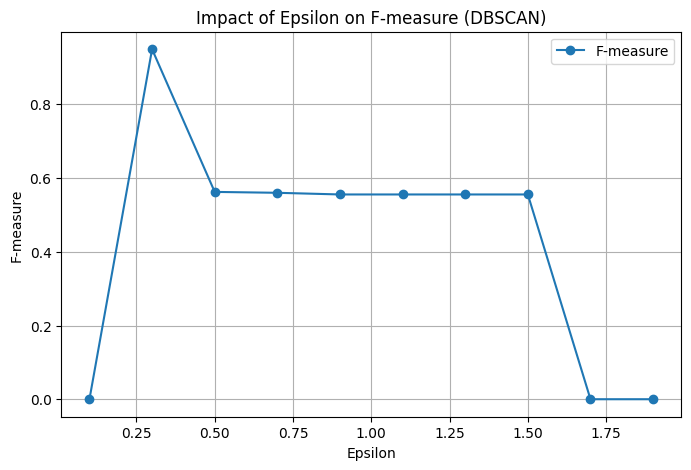

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(eps_values, f1_scores, marker='o', label='F-measure')
plt.title('Impact of Epsilon on F-measure (DBSCAN)')
plt.xlabel('Epsilon')
plt.ylabel('F-measure')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
min_samples_values = np.arange(2, 10)
purity_scores = []
outliers_min_samples = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    num_outliers = np.sum(labels == -1)
    outliers_min_samples.append(num_outliers)
    
    if len(np.unique(labels)) > 1:
        purity = cluster_purity(labels, y)
    else:
        purity = 0
    purity_scores.append(purity)


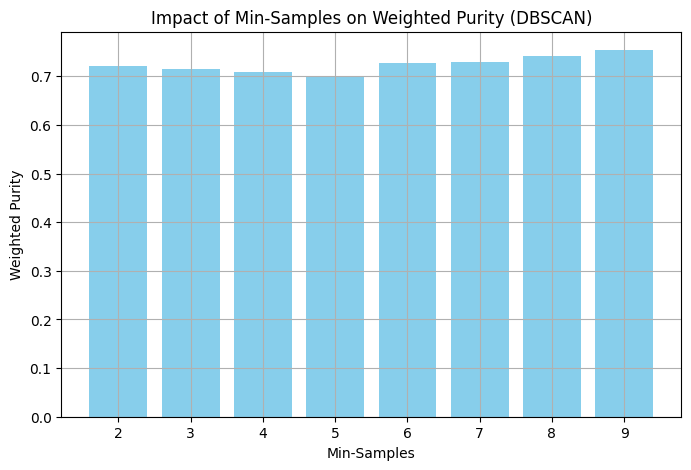

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(min_samples_values, purity_scores, color='skyblue')
plt.title('Impact of Min-Samples on Weighted Purity (DBSCAN)')
plt.xlabel('Min-Samples')
plt.ylabel('Weighted Purity')
plt.grid(True)
plt.show()


In [30]:
print("Outliers detected for different epsilon values: ", outliers)
print("Outliers detected for different min_samples values: ", outliers_min_samples)


Outliers detected for different epsilon values:  [np.int64(150), np.int64(96), np.int64(17), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Outliers detected for different min_samples values:  [np.int64(6), np.int64(10), np.int64(13), np.int64(17), np.int64(22), np.int64(24), np.int64(26), np.int64(28)]


# Q5.  Compare the clustering output of these three clustering algorithms (kmeans/Agglomerative/DBSCAN) using bar plot on a labelled dataset considering optimal parameter setting for each.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import classification_report, f1_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [32]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [34]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)


In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

mask_dbscan = dbscan_labels != -1
filtered_dbscan_labels = dbscan_labels[mask_dbscan]
filtered_true_labels_dbscan = y[mask_dbscan]


In [36]:
print("KMeans Classification Report:")
print(classification_report(y, kmeans_labels))

print("Agglomerative Clustering Classification Report:")
print(classification_report(y, agglo_labels))

print("DBSCAN Classification Report (filtered):")
print(classification_report(filtered_true_labels_dbscan, filtered_dbscan_labels))


KMeans Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0

Agglomerative Clustering Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.07      0.04      0.05        50

    accuracy                           0.01       150
   macro avg       0.02      0.01      0.02       150
weighted avg       0.02      0.01      0.02       150

DBSCAN Classification Report (filtered):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
          

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
f1_kmeans = f1_score(y, kmeans_labels, average='weighted')
f1_agglo = f1_score(y, agglo_labels, average='weighted')
f1_dbscan = f1_score(filtered_true_labels_dbscan, filtered_dbscan_labels, average='weighted')


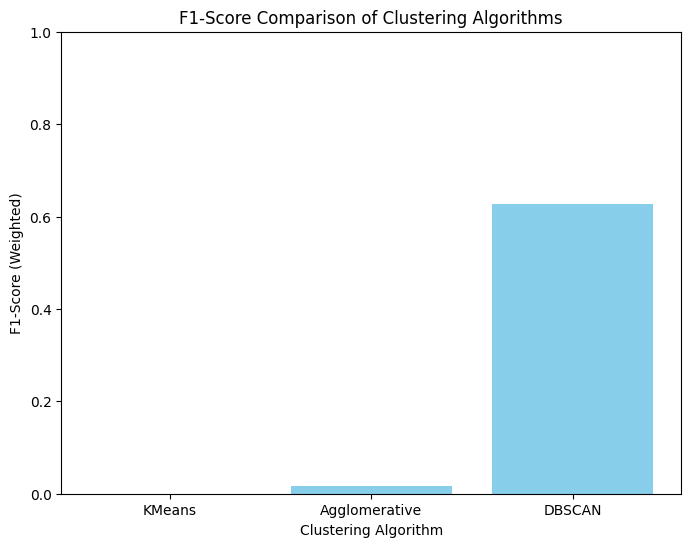

In [38]:
labels = ['KMeans', 'Agglomerative', 'DBSCAN']
f1_scores = [f1_kmeans, f1_agglo, f1_dbscan]

plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color='skyblue')
plt.title('F1-Score Comparison of Clustering Algorithms')
plt.xlabel('Clustering Algorithm')
plt.ylabel('F1-Score (Weighted)')
plt.ylim(0, 1)
plt.show()
